roc curve using euclidean distance

In [1]:
import pandas as pd
from deepface import DeepFace
from chefboost import Chefboost as chef #for threshold 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,roc_curve,auc

In [84]:
df = pd.read_csv('../../dataset/Labeled Faces in the Wild Dataset/master.csv')
df['file_x'] = '../../dataset/Labeled Faces in the Wild Dataset/' + df['file_x'].astype(str)
df['file_y'] = '../../dataset/Labeled Faces in the Wild Dataset/' + df['file_y'].astype(str)
instances = df[["file_x", "file_y"]].values.tolist()

facenet model cosine distance

In [85]:
model_name = "Facenet"
distance_metric = "euclidean"

In [86]:
resp_obj = DeepFace.verify(instances, model_name = model_name, distance_metric = distance_metric)

Verification: 100%|██████████| 300/300 [11:32<00:00,  2.31s/it]


In [87]:
distances = []
for i in range(0, len(instances)):
    distance = round(resp_obj["pair_%s" % (i+1)]["distance"], 4)
    distances.append(distance)
df["distance"] = distances
config = {'algorithm': 'C4.5'}
tmp_df = df[['distance', 'Decision']].rename(columns = {"decision": "Decision"}).copy()
model = chef.fit(tmp_df, config)

[INFO]:  2 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  0.8034493923187256  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  98.33333333333333 % on  300  instances
Labels:  ['Yes' 'No']
Confusion matrix:  [[34, 1], [4, 261]]
Precision:  97.1429 %, Recall:  89.4737 %, F1:  93.1507 %


In [119]:
threshold = 11.4156 #comes from c4.5 algorithm

In [120]:
df["prediction"] = "No"
idx = df[df.distance <= threshold].index
df.loc[idx, 'prediction'] = 'Yes'
df["p"] = "No"
roc_point=[]
thresholds = list(np.array(list(range(1,100,1)))/1)
for threshold in thresholds:
    idx = df[df.distance <= threshold].index
    df.loc[idx, 'p'] = 'Yes'
    cm = confusion_matrix(df.Decision.values, df.p.values)
    tn, fp, fn, tp = cm.ravel()
    tpr = tp / (tp + fn)
    fpr = tp / (tp + fp)
    roc_point.append([tpr,fpr])


In [121]:
facenet_pivot = pd.DataFrame(roc_point,columns = ['tpr','fpr'])
facenet_pivot["threshold"] = thresholds

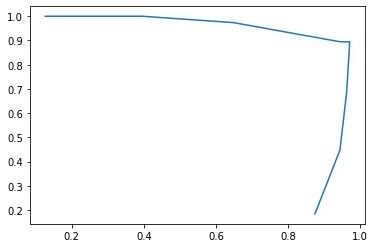

In [122]:
plt.plot(facenet_pivot.fpr,facenet_pivot.tpr) #roc curve of facenet using cosine distance

OpenFace model cosine distance

In [68]:
model_name = "OpenFace"
distance_metric = "euclidean"

In [69]:
resp_obj = DeepFace.verify(instances, model_name = model_name, distance_metric = distance_metric)

Verification: 100%|██████████| 300/300 [10:26<00:00,  2.09s/it]


In [70]:
distances = []
for i in range(0, len(instances)):
    distance = round(resp_obj["pair_%s" % (i+1)]["distance"], 4)
    distances.append(distance)
df["distance"] = distances
config = {'algorithm': 'C4.5'}
tmp_df = df[['distance', 'Decision']].rename(columns = {"decision": "Decision"}).copy()
model = chef.fit(tmp_df, config)

[INFO]:  2 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  0.6149978637695312  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  89.0 % on  300  instances
Labels:  ['Yes' 'No']
Confusion matrix:  [[5, 0], [33, 262]]
Precision:  100.0 %, Recall:  13.1579 %, F1:  23.2558 %


In [71]:
threshold = 0.3984 #comes from c4.5 algorithm

In [72]:
df["prediction"] = "No"
idx = df[df.distance <= threshold].index
df.loc[idx, 'prediction'] = 'Yes'
df["p"] = "No"
roc_point=[]
thresholds = list(np.array(list(range(1,100,1)))/100)
for threshold in thresholds:
    idx = df[df.distance <= threshold].index
    df.loc[idx, 'p'] = 'Yes'
    cm = confusion_matrix(df.Decision.values, df.p.values)
    tn, fp, fn, tp = cm.ravel()
    tpr = tp / (tp + fn)
    fpr = tp / (tp + fp)
    roc_point.append([tpr,fpr])

In [73]:
openface_pivot = pd.DataFrame(roc_point,columns = ['tpr','fpr'])
openface_pivot["threshold"] = thresholds

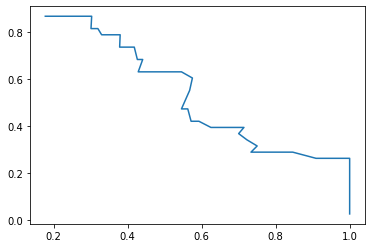

In [74]:
plt.plot(openface_pivot.fpr,openface_pivot.tpr) #roc curve of openface using cosine distance

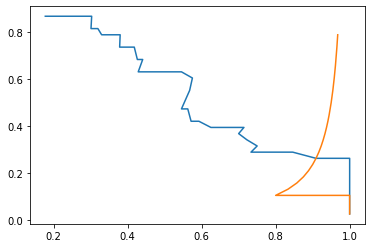

In [75]:
plt.plot(openface_pivot.fpr,openface_pivot.tpr)
plt.plot(facenet_pivot.fpr,facenet_pivot.tpr)

VGG-Face model cosine distance

In [76]:
model_name = "VGG-Face"
distance_metric = "euclidean"

In [77]:
resp_obj = DeepFace.verify(instances, model_name = model_name, distance_metric = distance_metric)

Verification: 100%|██████████| 300/300 [19:03<00:00,  3.81s/it]


In [78]:
distances = []
for i in range(0, len(instances)):
    distance = round(resp_obj["pair_%s" % (i+1)]["distance"], 4)
    distances.append(distance)
df["distance"] = distances
config = {'algorithm': 'C4.5'}
tmp_df = df[['distance', 'Decision']].rename(columns = {"decision": "Decision"}).copy()
model = chef.fit(tmp_df, config)

[INFO]:  2 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  0.7780015468597412  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  91.0 % on  300  instances
Labels:  ['Yes' 'No']
Confusion matrix:  [[11, 0], [27, 262]]
Precision:  100.0 %, Recall:  28.9474 %, F1:  44.898 %


In [79]:
threshold = 0.4058 #comes from c4.5 algorithm

In [80]:
df["prediction"] = "No"
idx = df[df.distance <= threshold].index
df.loc[idx, 'prediction'] = 'Yes'
df["p"] = "No"
roc_point=[]
thresholds = list(np.array(list(range(1,100,1)))/100)
for threshold in thresholds:
    idx = df[df.distance <= threshold].index
    df.loc[idx, 'p'] = 'Yes'
    cm = confusion_matrix(df.Decision.values, df.p.values)
    tn, fp, fn, tp = cm.ravel()
    tpr = tp / (tp + fn)
    fpr = tp / (tp + fp)
    roc_point.append([tpr,fpr])

In [81]:
vggface_pivot = pd.DataFrame(roc_point,columns = ['tpr','fpr'])
vggface_pivot["threshold"] = thresholds

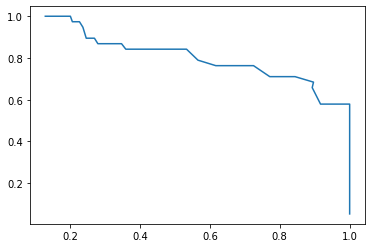

In [82]:
plt.plot(vggface_pivot.fpr,vggface_pivot.tpr)

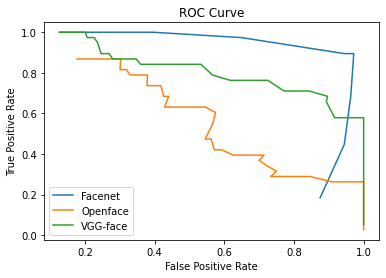

In [123]:
plt.plot(facenet_pivot.fpr,facenet_pivot.tpr,label='Facenet')
plt.plot(openface_pivot.fpr,openface_pivot.tpr,label='Openface')
plt.plot(vggface_pivot.fpr,vggface_pivot.tpr,label='VGG-face')
# Title
plt.title('ROC Curve')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()